In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install braindecode==0.4.85
!pip install eeglib

     |████████████████████████████████| 324 kB 5.2 MB/s 
     |████████████████████████████████| 7.4 MB 34.7 MB/s 
  Created wheel for braindecode: filename=Braindecode-0.4.85-py3-none-any.whl size=71094 sha256=7137d19e26f63319378c15067b095b50f817bd46b45a204ebc1b38f665ec8adf
  Stored in directory: /root/.cache/pip/wheels/eb/67/4c/81ad85409f913dd7e3ebb4fb5896839680c5627c04d91e3b78
Successfully built braindecode
     |████████████████████████████████| 1.7 MB 8.2 MB/s 


In [3]:
import mne
from braindecode.datasets.bbci import  BBCIDataset
import logging
import sys
import os.path
from collections import OrderedDict
import numpy as np

from braindecode.datasets.bbci import  BBCIDataset
from braindecode.datautil.signalproc import highpass_cnt
from braindecode.datautil.trial_segment import create_signal_target_from_raw_mne
from braindecode.mne_ext.signalproc import mne_apply, resample_cnt
from braindecode.datautil.signalproc import exponential_running_standardize

def load_bbci_data(filename, low_cut_hz):
    load_sensor_names = ['C3', 'C4', 'Cz']
    loader = BBCIDataset(filename, load_sensor_names=load_sensor_names)

    cnt = loader.load()

    # Cleaning: First find all trials that have absolute microvolt values
    # larger than +- 800 inside them and remember them for removal later

    marker_def = OrderedDict([('Right Hand', [1]), ('Left Hand', [2],),
                              ('Rest', [3]), ('Feet', [4])])
    clean_ival = [0, 4000]

    set_for_cleaning = create_signal_target_from_raw_mne(cnt, marker_def,
                                                  clean_ival)

    clean_trial_mask = np.max(np.abs(set_for_cleaning.X), axis=(1, 2)) < 800

    # now pick only sensors with C in their name
    # as they cover motor cortex
    C_sensors = load_sensor_names
    cnt = cnt.pick_channels(C_sensors)

    # Further preprocessings as descibed in paper
    cnt = resample_cnt(cnt, 250.0)
    cnt = mne_apply(
        lambda a: highpass_cnt(
            a, low_cut_hz, cnt.info['sfreq'], filt_order=3, axis=1),
        cnt)
    cnt = mne_apply(
        lambda a: exponential_running_standardize(a.T, factor_new=1e-3,
                                                  init_block_size=1000,
                                                  eps=1e-4).T,
        cnt)

    # Trial interval, start at -500 already, since improved decoding for networks
    ival = [0, 2000]

    dataset = create_signal_target_from_raw_mne(cnt, marker_def, ival)
    dataset.X = dataset.X[clean_trial_mask]
    dataset.y = dataset.y[clean_trial_mask]
    return dataset

list_a = [] #存放所有.mat文件的路径
dir_str = '/content/drive/MyDrive/EEG-dataset/high-gamma-dataset'
for i in range(1, 29):
  list_a.append(os.path.join(dir_str, "a"+str(i)+".mat"))

datasets = []
for mat_path in list_a:
  datasets.append(load_bbci_data(mat_path, 0))

Creating RawArray with float64 data, n_channels=3, n_times=1225545
    Range : 0 ... 1225544 =      0.000 ...  2451.088 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=612772
    Range : 0 ... 612771 =      0.000 ...  2451.084 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3131420
    Range : 0 ... 3131419 =      0.000 ...  6262.838 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1565710
    Range : 0 ... 1565709 =      0.000 ...  6262.836 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3347155
    Range : 0 ... 3347154 =      0.000 ...  6694.308 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1673577
    Range : 0 ... 1673576 =      0.000 ...  6694.304 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3451320
    Range : 0 ... 3451319 =      0.000 ...  6902.638 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1725660
    Range : 0 ... 1725659 =      0.000 ...  6902.636 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=2736300
    Range : 0 ... 2736299 =      0.000 ...  5472.598 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1368150
    Range : 0 ... 1368149 =      0.000 ...  5472.596 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3387290
    Range : 0 ... 3387289 =      0.000 ...  6774.578 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1693645
    Range : 0 ... 1693644 =      0.000 ...  6774.576 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3354460
    Range : 0 ... 3354459 =      0.000 ...  6708.918 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1677230
    Range : 0 ... 1677229 =      0.000 ...  6708.916 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=2511860
    Range : 0 ... 2511859 =      0.000 ...  5023.718 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1255930
    Range : 0 ... 1255929 =      0.000 ...  5023.716 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3383655
    Range : 0 ... 3383654 =      0.000 ...  6767.308 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1691827
    Range : 0 ... 1691826 =      0.000 ...  6767.304 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3386150
    Range : 0 ... 3386149 =      0.000 ...  6772.298 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1693075
    Range : 0 ... 1693074 =      0.000 ...  6772.296 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3386765
    Range : 0 ... 3386764 =      0.000 ...  6773.528 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1693382
    Range : 0 ... 1693381 =      0.000 ...  6773.524 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3385750
    Range : 0 ... 3385749 =      0.000 ...  6771.498 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1692875
    Range : 0 ... 1692874 =      0.000 ...  6771.496 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3032845
    Range : 0 ... 3032844 =      0.000 ...  6065.688 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1516422
    Range : 0 ... 1516421 =      0.000 ...  6065.684 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=3345425
    Range : 0 ... 3345424 =      0.000 ...  6690.848 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=1672712
    Range : 0 ... 1672711 =      0.000 ...  6690.844 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=616535
    Range : 0 ... 616534 =      0.000 ...  1233.068 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....
/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=308267
    Range : 0 ... 308266 =      0.000 ...  1233.064 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=617735
    Range : 0 ... 617734 =      0.000 ...  1235.468 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=308867
    Range : 0 ... 308866 =      0.000 ...  1235.464 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=609030
    Range : 0 ... 609029 =      0.000 ...  1218.058 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=304515
    Range : 0 ... 304514 =      0.000 ...  1218.056 secs


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Ready.
Creating RawArray with float64 data, n_channels=3, n_times=617090
    Range : 0 ... 617089 =      0.000 ...  1234.178 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=308545
    Range : 0 ... 308544 =      0.000 ...  1234.176 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=607250
    Range : 0 ... 607249 =      0.000 ...  1214.498 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=303625


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


    Range : 0 ... 303624 =      0.000 ...  1214.496 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=615705
    Range : 0 ... 615704 =      0.000 ...  1231.408 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=307852
    Range : 0 ... 307851 =      0.000 ...  1231.404 secs


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Ready.
Creating RawArray with float64 data, n_channels=3, n_times=608850
    Range : 0 ... 608849 =      0.000 ...  1217.698 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=304425
    Range : 0 ... 304424 =      0.000 ...  1217.696 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=616070
    Range : 0 ... 616069 =      0.000 ...  1232.138 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=308035
    Range : 0 ... 308034 =      0.000 ...  1232.136 secs


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Ready.
Creating RawArray with float64 data, n_channels=3, n_times=614600
    Range : 0 ... 614599 =      0.000 ...  1229.198 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=307300
    Range : 0 ... 307299 =      0.000 ...  1229.196 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=614555
    Range : 0 ... 614554 =      0.000 ...  1229.108 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=307277
    Range : 0 ... 307276 =      0.000 ...  1229.104 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=610820
    Range : 0 ... 610819 =      0.000 ...  1221.638 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=305410
    Range : 0 ... 305409 =      0.000 ...  1221.636 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=614290
    Range : 0 ... 614289 =      0.000 ...  1228.578 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=307145
    Range : 0 ... 307144 =      0.000 ...  1228.576 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=607735
    Range : 0 ... 607734 =      0.000 ...  1215.468 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=303867
    Range : 0 ... 303866 =      0.000 ...  1215.464 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


Creating RawArray with float64 data, n_channels=3, n_times=608505
    Range : 0 ... 608504 =      0.000 ...  1217.008 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/datasets/bbci.py:210: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T
This is not causal, uses future data....


Creating RawArray with float64 data, n_channels=3, n_times=304252
    Range : 0 ... 304251 =      0.000 ...  1217.004 secs
Ready.


/usr/local/lib/python3.7/dist-packages/braindecode/mne_ext/signalproc.py:67: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  new_info["sfreq"] = new_fs


In [4]:
import numpy as np
train_X, train_y = [], []
for D in datasets:
  train_X.append(np.transpose(np.asarray(D.X), [0, 2, 1]).reshape([-1, 25, 20, 3]))
  train_y.append(np.asarray(D.y))
train_X = np.concatenate(train_X, axis=0)
train_y = np.concatenate(train_y, axis=0)
train_X.shape

(13480, 25, 20, 3)

In [5]:
#split validation dataset
import random
sample_len = train_X.shape[0]
splite_ratio = 0.1
valid_num = int(sample_len*splite_ratio)
valid_idx = random.sample(list(range(sample_len)), valid_num) #生成随机数，validation的下标们
train_idx = np.asarray(list(set(list(range(sample_len))) - set(list(valid_idx)))) #set集合可以来做减法，交并集

valid_X = train_X[valid_idx, :, :, :]
valid_y = train_y[valid_idx]
train_X = train_X[train_idx, :, :, :]
train_y = train_y[train_idx]

# aug_valid_X1 = aug_X_1[valid_idx, :, :, :]
# aug_valid_X2 = aug_X_2[valid_idx, :, :, :]
# aug_train_X1 = aug_X_1[train_idx, :, :, :]
# aug_train_X2 = aug_X_2[train_idx, :, :, :]

In [6]:
## import tf and check gpu is_available
import tensorflow as tf
assert tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [8]:
## build model
batch_size = 64
views = 2
assert views == 2
temperature = 0.2

def get_model(input_):
  inputs = input_

  # CONV_1
  C_1 = tf.keras.layers.Conv2D(32, (3, 3), padding="SAME", name="C_1")(inputs)
  B_1 = tf.keras.layers.BatchNormalization(name="B_1")(C_1)
  L_1 = tf.keras.layers.LeakyReLU()(B_1)
  # D_1 = tf.keras.layers.Dropout(rate=0.1)(L_1)

  # CONV_2
  C_2 = tf.keras.layers.Conv2D(32, (3, 3), padding="SAME", name="C_2")(L_1)
  B_2 = tf.keras.layers.BatchNormalization(name="B_2")(C_2)
  L_2 = tf.keras.layers.LeakyReLU()(B_2)
  
  # MAX_POOLING_1
  M_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME")(L_2) 
  print(M_1.shape) #13, 10, 32

  # CONV_3
  # C_3_IN = tf.concat((L_2, L_1), axis=3) 
  C_3 = tf.keras.layers.Conv2D(64, (3, 3), padding="SAME", name="C_3")(M_1)
  B_3 = tf.keras.layers.BatchNormalization(name="B_3")(C_3)
  L_3 = tf.keras.layers.LeakyReLU()(B_3)
  # D_3 = tf.keras.layers.Dropout(rate=0.1)(L_3)


  # CONV_4
  C_4 = tf.keras.layers.Conv2D(64, (3, 3), padding="SAME", name="C_4")(L_3)
  B_4 = tf.keras.layers.BatchNormalization(name="B_4")(C_4)
  L_4 = tf.keras.layers.LeakyReLU()(B_4)
  # D_4 = tf.keras.layers.Dropout(rate=0.1)(L_4)

  # MAX_POOLING_2
  M_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME")(L_4) 
  print(M_2.shape)

  # FC
  F_IN = tf.reshape(M_2, [-1, 7 * 5 * 64])
  F_1 = tf.keras.layers.Dense(256, name="simCLR_F_1")(F_IN)#非线性分类器
  F_1_L = tf.keras.layers.ReLU()(F_1)
  F_2 = tf.keras.layers.Dense(128, name="simCLR_F_2")(F_1_L)
  F_2_L = tf.keras.layers.ReLU()(F_2)
  features = tf.keras.layers.Dense(50, name="simCLR_F_3")(F_2_L)
  return features

In [9]:
negative_mask = np.ones((batch_size, 2 * batch_size), dtype=bool)
for i in range(batch_size):
    negative_mask[i, i] = 0
    negative_mask[i, i + batch_size] = 0
negative_mask = tf.constant(negative_mask) #生成一个常量张量

@tf.function
def train_step(xis, xjs, model, optimizer, criterion, temperature):
    with tf.GradientTape() as tape:
      zis = model(xis)
      zjs = model(xjs)

      # normalize projection feature vectors
      zis = tf.math.l2_normalize(zis, axis=1)
      zjs = tf.math.l2_normalize(zjs, axis=1)

      l_pos = tf.matmul(tf.expand_dims(zis, 1), tf.expand_dims(zjs, 2)) #两个矩阵的乘积
      l_pos = tf.reshape(l_pos, (batch_size, 1))
      l_pos /= temperature

      negatives = tf.concat([zjs, zis], axis=0)

      loss = 0

      for positives in [zis, zjs]:
        # l_neg = sim_func_dim2(positives, negatives)
        l_neg = tf.tensordot(tf.expand_dims(positives, 1), tf.expand_dims(tf.transpose(negatives), 0), axes=2)#矩阵相乘

        labels = tf.zeros(batch_size, dtype=tf.int32)

        l_neg = tf.boolean_mask(l_neg, negative_mask)#返回negative_mask为true对应的l_neg的元素
        l_neg = tf.reshape(l_neg, (batch_size, -1))
        l_neg /= temperature

        logits = tf.concat([l_pos, l_neg], axis=1) 
        loss += criterion(y_pred=logits, y_true=labels)

      loss = loss / (2 * batch_size)

    gradients = tape.gradient(loss, model.trainable_variables) #梯度返传，更新参数
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss

In [10]:
def valid_step(xis, xjs, model,temperature):
  zis = model(xis)
  zjs = model(xjs)

  # normalize projection feature vectors
  zis = tf.math.l2_normalize(zis, axis=1)
  zjs = tf.math.l2_normalize(zjs, axis=1)

  l_pos = tf.matmul(tf.expand_dims(zis, 1), tf.expand_dims(zjs, 2)) #两个矩阵的乘积
  l_pos = tf.reshape(l_pos, (batch_size, 1))
  l_pos /= temperature

  negatives = tf.concat([zjs, zis], axis=0)

  logits = []

  for positives in [zis, zjs]:
    # l_neg = sim_func_dim2(positives, negatives)
    l_neg = tf.tensordot(tf.expand_dims(positives, 1), tf.expand_dims(tf.transpose(negatives), 0), axes=2)#矩阵相乘

    labels = tf.zeros(batch_size, dtype=tf.int32)

    l_neg = tf.boolean_mask(l_neg, negative_mask)#返回negative_mask为true对应的l_neg的元素
    l_neg = tf.reshape(l_neg, (batch_size, -1))
    l_neg /= temperature

    logits.append(tf.concat([l_pos, l_neg], axis=1))

  return logits

In [11]:
from tqdm import tqdm
mu, sigma =0, 1
def data_augmentation(batch, mu = mu, sigma = sigma):
  return np.random.normal(0, 1, size=batch.shape) + batch

def get_ds(dataset):
  train_ds = []
  start = 0
  while True:
    end = start + batch_size
    if end < dataset.shape[0]:
      train_ds.append(dataset[start:end])
      start = end
    else:
      break
  return train_ds

def valid_simclr(model, dataset, temperature=0.1):
  positive_num = 0
  sample_num = 0
  for eeg_batch in dataset:
    a = data_augmentation(eeg_batch)
    b = data_augmentation(eeg_batch)

    logit1, logit2 = valid_step(a, b, model, temperature)
    sample_num += (logit1.shape[0]+logit2.shape[0])
    positive_num += (tf.reduce_sum(tf.cast(tf.argmax(logit1, axis=-1) == 0, tf.int32)) + tf.reduce_sum(tf.cast(tf.argmax(logit1, axis=-1) == 0, tf.int32)))
  return positive_num / sample_num

def train_simclr(model, train_dataset, valid_dataset, optimizer, criterion,
                 temperature=0.1, epochs=100):
    step_wise_loss = []
    epoch_wise_loss = []

    for epoch in tqdm(range(epochs)):
      for eeg_batch in train_dataset:
        a = data_augmentation(eeg_batch)
        b = data_augmentation(eeg_batch)

        loss = train_step(a, b, model, optimizer, criterion, temperature)
        step_wise_loss.append(loss)

      epoch_wise_loss.append(np.mean(step_wise_loss))
      # wandb.log({"nt_xentloss": np.mean(step_wise_loss)}) 
      top1_acc = valid_simclr(model, valid_dataset, temperature)
      print("epoch: {} loss: {:.3f} tpo1_acc{}%".format(epoch + 1, np.mean(step_wise_loss), top1_acc*100))

    return epoch_wise_loss, model



In [12]:
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, 
                                                          reduction=tf.keras.losses.Reduction.SUM)
decay_steps = 1000
learning_rate = 0.001
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate=learning_rate, decay_steps=decay_steps)
optimizer = tf.keras.optimizers.SGD(lr_decayed_fn)

input_eeg = tf.keras.Input(shape=[25, 20, 3])
simclr_2 = tf.keras.Model(input_eeg, get_model(input_eeg))
train_ds = get_ds(train_X)
valid_ds = get_ds(valid_X)

epoch_wise_loss, resnet_simclr  = train_simclr(simclr_2, train_ds, valid_ds, optimizer, criterion,
                 temperature=temperature, epochs=200)
simclr_2.save_weights("/content/drive/MyDrive/ckpt/high_gamma_pretrain_simclr/conv6net.h5")

(None, 13, 10, 32)
(None, 7, 5, 64)


  0%|          | 1/200 [00:16<54:22, 16.39s/it]

epoch: 1 loss: 3.002 tpo1_acc90.77380952380952%


  1%|          | 2/200 [00:21<32:08,  9.74s/it]

epoch: 2 loss: 2.481 tpo1_acc97.69345238095238%


  2%|▏         | 3/200 [00:26<24:57,  7.60s/it]

epoch: 3 loss: 2.258 tpo1_acc97.99107142857143%


  2%|▏         | 4/200 [00:31<21:31,  6.59s/it]

epoch: 4 loss: 2.135 tpo1_acc98.36309523809523%


  2%|▎         | 5/200 [00:36<19:48,  6.10s/it]

epoch: 5 loss: 2.061 tpo1_acc98.66071428571429%


  3%|▎         | 6/200 [00:41<18:34,  5.75s/it]

epoch: 6 loss: 2.011 tpo1_acc98.66071428571429%


  4%|▎         | 7/200 [00:46<17:44,  5.52s/it]

epoch: 7 loss: 1.975 tpo1_acc98.36309523809523%


  4%|▍         | 8/200 [00:51<17:08,  5.36s/it]

epoch: 8 loss: 1.948 tpo1_acc98.58630952380952%


  4%|▍         | 9/200 [00:56<16:42,  5.25s/it]

epoch: 9 loss: 1.927 tpo1_acc97.69345238095238%


  5%|▌         | 10/200 [01:01<16:25,  5.19s/it]

epoch: 10 loss: 1.911 tpo1_acc98.21428571428571%


  6%|▌         | 11/200 [01:07<16:12,  5.14s/it]

epoch: 11 loss: 1.897 tpo1_acc98.66071428571429%


  6%|▌         | 12/200 [01:12<16:02,  5.12s/it]

epoch: 12 loss: 1.885 tpo1_acc98.80952380952381%


  6%|▋         | 13/200 [01:17<15:55,  5.11s/it]

epoch: 13 loss: 1.876 tpo1_acc98.36309523809523%


  7%|▋         | 14/200 [01:22<15:45,  5.08s/it]

epoch: 14 loss: 1.867 tpo1_acc98.36309523809523%


  8%|▊         | 15/200 [01:27<15:40,  5.08s/it]

epoch: 15 loss: 1.860 tpo1_acc98.13988095238095%


  8%|▊         | 16/200 [01:32<15:33,  5.07s/it]

epoch: 16 loss: 1.854 tpo1_acc98.21428571428571%


  8%|▊         | 17/200 [01:37<15:26,  5.06s/it]

epoch: 17 loss: 1.849 tpo1_acc98.21428571428571%


  9%|▉         | 18/200 [01:42<15:20,  5.06s/it]

epoch: 18 loss: 1.844 tpo1_acc98.4375%


 10%|▉         | 19/200 [01:47<15:17,  5.07s/it]

epoch: 19 loss: 1.839 tpo1_acc98.13988095238095%


 10%|█         | 20/200 [01:52<15:11,  5.07s/it]

epoch: 20 loss: 1.836 tpo1_acc98.13988095238095%


 10%|█         | 21/200 [01:57<15:05,  5.06s/it]

epoch: 21 loss: 1.832 tpo1_acc98.95833333333334%


 11%|█         | 22/200 [02:02<15:01,  5.07s/it]

epoch: 22 loss: 1.829 tpo1_acc98.51190476190477%


 12%|█▏        | 23/200 [02:07<14:52,  5.04s/it]

epoch: 23 loss: 1.826 tpo1_acc98.66071428571429%


 12%|█▏        | 24/200 [02:12<14:46,  5.04s/it]

epoch: 24 loss: 1.823 tpo1_acc98.21428571428571%


 12%|█▎        | 25/200 [02:17<14:44,  5.05s/it]

epoch: 25 loss: 1.821 tpo1_acc98.28869047619048%


 13%|█▎        | 26/200 [02:22<14:41,  5.07s/it]

epoch: 26 loss: 1.818 tpo1_acc98.51190476190477%


 14%|█▎        | 27/200 [02:28<14:39,  5.08s/it]

epoch: 27 loss: 1.816 tpo1_acc98.88392857142857%


 14%|█▍        | 28/200 [02:33<14:34,  5.08s/it]

epoch: 28 loss: 1.814 tpo1_acc98.58630952380952%


 14%|█▍        | 29/200 [02:38<14:30,  5.09s/it]

epoch: 29 loss: 1.812 tpo1_acc98.06547619047619%


 15%|█▌        | 30/200 [02:43<14:24,  5.09s/it]

epoch: 30 loss: 1.811 tpo1_acc98.66071428571429%


 16%|█▌        | 31/200 [02:48<14:19,  5.09s/it]

epoch: 31 loss: 1.809 tpo1_acc98.13988095238095%


 16%|█▌        | 32/200 [02:53<14:15,  5.09s/it]

epoch: 32 loss: 1.808 tpo1_acc98.36309523809523%


 16%|█▋        | 33/200 [02:58<14:08,  5.08s/it]

epoch: 33 loss: 1.806 tpo1_acc98.58630952380952%


 17%|█▋        | 34/200 [03:03<14:04,  5.09s/it]

epoch: 34 loss: 1.805 tpo1_acc98.58630952380952%


 18%|█▊        | 35/200 [03:08<13:58,  5.08s/it]

epoch: 35 loss: 1.804 tpo1_acc98.73511904761905%


 18%|█▊        | 36/200 [03:13<13:54,  5.09s/it]

epoch: 36 loss: 1.802 tpo1_acc98.88392857142857%


 18%|█▊        | 37/200 [03:18<13:50,  5.09s/it]

epoch: 37 loss: 1.801 tpo1_acc97.91666666666666%


 19%|█▉        | 38/200 [03:23<13:44,  5.09s/it]

epoch: 38 loss: 1.800 tpo1_acc98.36309523809523%


 20%|█▉        | 39/200 [03:29<13:40,  5.09s/it]

epoch: 39 loss: 1.799 tpo1_acc98.51190476190477%


 20%|██        | 40/200 [03:34<13:34,  5.09s/it]

epoch: 40 loss: 1.798 tpo1_acc98.4375%


 20%|██        | 41/200 [03:39<13:29,  5.09s/it]

epoch: 41 loss: 1.797 tpo1_acc97.54464285714286%


 21%|██        | 42/200 [03:44<13:24,  5.09s/it]

epoch: 42 loss: 1.796 tpo1_acc98.06547619047619%


 22%|██▏       | 43/200 [03:49<13:19,  5.09s/it]

epoch: 43 loss: 1.795 tpo1_acc98.4375%


 22%|██▏       | 44/200 [03:54<13:14,  5.09s/it]

epoch: 44 loss: 1.795 tpo1_acc98.4375%


 22%|██▎       | 45/200 [03:59<13:10,  5.10s/it]

epoch: 45 loss: 1.794 tpo1_acc99.10714285714286%


 23%|██▎       | 46/200 [04:04<13:06,  5.11s/it]

epoch: 46 loss: 1.793 tpo1_acc98.28869047619048%


 24%|██▎       | 47/200 [04:09<12:59,  5.10s/it]

epoch: 47 loss: 1.792 tpo1_acc99.10714285714286%


 24%|██▍       | 48/200 [04:14<12:56,  5.11s/it]

epoch: 48 loss: 1.792 tpo1_acc98.36309523809523%


 24%|██▍       | 49/200 [04:20<12:52,  5.12s/it]

epoch: 49 loss: 1.791 tpo1_acc98.06547619047619%


 25%|██▌       | 50/200 [04:25<12:46,  5.11s/it]

epoch: 50 loss: 1.791 tpo1_acc98.36309523809523%


 26%|██▌       | 51/200 [04:30<12:42,  5.11s/it]

epoch: 51 loss: 1.790 tpo1_acc98.73511904761905%


 26%|██▌       | 52/200 [04:35<12:36,  5.11s/it]

epoch: 52 loss: 1.790 tpo1_acc98.73511904761905%


 26%|██▋       | 53/200 [04:40<12:29,  5.10s/it]

epoch: 53 loss: 1.789 tpo1_acc98.4375%


 27%|██▋       | 54/200 [04:45<12:26,  5.11s/it]

epoch: 54 loss: 1.788 tpo1_acc98.80952380952381%


 28%|██▊       | 55/200 [04:50<12:17,  5.09s/it]

epoch: 55 loss: 1.788 tpo1_acc98.80952380952381%


 28%|██▊       | 56/200 [04:55<12:14,  5.10s/it]

epoch: 56 loss: 1.787 tpo1_acc98.28869047619048%


 28%|██▊       | 57/200 [05:00<12:06,  5.08s/it]

epoch: 57 loss: 1.787 tpo1_acc98.13988095238095%


 29%|██▉       | 58/200 [05:05<12:00,  5.08s/it]

epoch: 58 loss: 1.786 tpo1_acc98.4375%


 30%|██▉       | 59/200 [05:11<11:57,  5.09s/it]

epoch: 59 loss: 1.786 tpo1_acc98.73511904761905%


 30%|███       | 60/200 [05:16<11:51,  5.08s/it]

epoch: 60 loss: 1.786 tpo1_acc98.36309523809523%


 30%|███       | 61/200 [05:21<11:47,  5.09s/it]

epoch: 61 loss: 1.785 tpo1_acc97.99107142857143%


 31%|███       | 62/200 [05:26<11:42,  5.09s/it]

epoch: 62 loss: 1.785 tpo1_acc98.36309523809523%


 32%|███▏      | 63/200 [05:31<11:37,  5.09s/it]

epoch: 63 loss: 1.784 tpo1_acc98.36309523809523%


 32%|███▏      | 64/200 [05:36<11:32,  5.09s/it]

epoch: 64 loss: 1.784 tpo1_acc98.28869047619048%


 32%|███▎      | 65/200 [05:41<11:28,  5.10s/it]

epoch: 65 loss: 1.784 tpo1_acc98.51190476190477%


 33%|███▎      | 66/200 [05:46<11:25,  5.11s/it]

epoch: 66 loss: 1.783 tpo1_acc98.13988095238095%


 34%|███▎      | 67/200 [05:51<11:18,  5.10s/it]

epoch: 67 loss: 1.783 tpo1_acc98.88392857142857%


 34%|███▍      | 68/200 [05:56<11:15,  5.12s/it]

epoch: 68 loss: 1.783 tpo1_acc98.66071428571429%


 34%|███▍      | 69/200 [06:02<11:08,  5.11s/it]

epoch: 69 loss: 1.782 tpo1_acc98.58630952380952%


 35%|███▌      | 70/200 [06:07<11:06,  5.12s/it]

epoch: 70 loss: 1.782 tpo1_acc98.4375%


 36%|███▌      | 71/200 [06:12<11:01,  5.13s/it]

epoch: 71 loss: 1.782 tpo1_acc98.66071428571429%


 36%|███▌      | 72/200 [06:17<10:57,  5.14s/it]

epoch: 72 loss: 1.781 tpo1_acc98.36309523809523%


 36%|███▋      | 73/200 [06:22<10:53,  5.14s/it]

epoch: 73 loss: 1.781 tpo1_acc98.80952380952381%


 37%|███▋      | 74/200 [06:27<10:48,  5.15s/it]

epoch: 74 loss: 1.781 tpo1_acc98.28869047619048%


 38%|███▊      | 75/200 [06:32<10:42,  5.14s/it]

epoch: 75 loss: 1.780 tpo1_acc98.4375%


 38%|███▊      | 76/200 [06:38<10:36,  5.13s/it]

epoch: 76 loss: 1.780 tpo1_acc98.36309523809523%


 38%|███▊      | 77/200 [06:43<10:29,  5.12s/it]

epoch: 77 loss: 1.780 tpo1_acc98.66071428571429%


 39%|███▉      | 78/200 [06:48<10:25,  5.12s/it]

epoch: 78 loss: 1.780 tpo1_acc98.36309523809523%


 40%|███▉      | 79/200 [06:53<10:21,  5.14s/it]

epoch: 79 loss: 1.779 tpo1_acc97.84226190476191%


 40%|████      | 80/200 [06:58<10:17,  5.14s/it]

epoch: 80 loss: 1.779 tpo1_acc98.51190476190477%


 40%|████      | 81/200 [07:03<10:11,  5.14s/it]

epoch: 81 loss: 1.779 tpo1_acc98.21428571428571%


 41%|████      | 82/200 [07:08<10:08,  5.16s/it]

epoch: 82 loss: 1.779 tpo1_acc97.99107142857143%


 42%|████▏     | 83/200 [07:14<10:02,  5.15s/it]

epoch: 83 loss: 1.778 tpo1_acc98.4375%


 42%|████▏     | 84/200 [07:19<09:56,  5.14s/it]

epoch: 84 loss: 1.778 tpo1_acc98.4375%


 42%|████▎     | 85/200 [07:24<09:51,  5.14s/it]

epoch: 85 loss: 1.778 tpo1_acc97.99107142857143%


 43%|████▎     | 86/200 [07:29<09:46,  5.14s/it]

epoch: 86 loss: 1.778 tpo1_acc98.21428571428571%


 44%|████▎     | 87/200 [07:34<09:42,  5.15s/it]

epoch: 87 loss: 1.778 tpo1_acc98.51190476190477%


 44%|████▍     | 88/200 [07:39<09:36,  5.14s/it]

epoch: 88 loss: 1.777 tpo1_acc98.51190476190477%


 44%|████▍     | 89/200 [07:44<09:30,  5.14s/it]

epoch: 89 loss: 1.777 tpo1_acc98.58630952380952%


 45%|████▌     | 90/200 [07:50<09:26,  5.15s/it]

epoch: 90 loss: 1.777 tpo1_acc98.73511904761905%


 46%|████▌     | 91/200 [07:55<09:21,  5.15s/it]

epoch: 91 loss: 1.777 tpo1_acc98.58630952380952%


 46%|████▌     | 92/200 [08:00<09:17,  5.16s/it]

epoch: 92 loss: 1.777 tpo1_acc98.80952380952381%


 46%|████▋     | 93/200 [08:05<09:11,  5.15s/it]

epoch: 93 loss: 1.777 tpo1_acc99.10714285714286%


 47%|████▋     | 94/200 [08:10<09:07,  5.17s/it]

epoch: 94 loss: 1.776 tpo1_acc98.28869047619048%


 48%|████▊     | 95/200 [08:15<09:01,  5.16s/it]

epoch: 95 loss: 1.776 tpo1_acc97.91666666666666%


 48%|████▊     | 96/200 [08:21<08:57,  5.17s/it]

epoch: 96 loss: 1.776 tpo1_acc98.66071428571429%


 48%|████▊     | 97/200 [08:26<08:51,  5.16s/it]

epoch: 97 loss: 1.776 tpo1_acc98.73511904761905%


 49%|████▉     | 98/200 [08:31<08:46,  5.16s/it]

epoch: 98 loss: 1.776 tpo1_acc98.4375%


 50%|████▉     | 99/200 [08:36<08:41,  5.17s/it]

epoch: 99 loss: 1.776 tpo1_acc98.58630952380952%


 50%|█████     | 100/200 [08:41<08:36,  5.16s/it]

epoch: 100 loss: 1.775 tpo1_acc98.80952380952381%


 50%|█████     | 101/200 [08:46<08:29,  5.15s/it]

epoch: 101 loss: 1.775 tpo1_acc98.58630952380952%


 51%|█████     | 102/200 [08:51<08:23,  5.14s/it]

epoch: 102 loss: 1.775 tpo1_acc98.58630952380952%


 52%|█████▏    | 103/200 [08:57<08:19,  5.15s/it]

epoch: 103 loss: 1.775 tpo1_acc98.73511904761905%


 52%|█████▏    | 104/200 [09:02<08:15,  5.16s/it]

epoch: 104 loss: 1.775 tpo1_acc97.84226190476191%


 52%|█████▎    | 105/200 [09:07<08:09,  5.15s/it]

epoch: 105 loss: 1.775 tpo1_acc97.69345238095238%


 53%|█████▎    | 106/200 [09:12<08:05,  5.17s/it]

epoch: 106 loss: 1.775 tpo1_acc98.51190476190477%


 54%|█████▎    | 107/200 [09:17<08:00,  5.17s/it]

epoch: 107 loss: 1.774 tpo1_acc98.36309523809523%


 54%|█████▍    | 108/200 [09:23<07:56,  5.18s/it]

epoch: 108 loss: 1.774 tpo1_acc98.58630952380952%


 55%|█████▍    | 109/200 [09:28<07:50,  5.17s/it]

epoch: 109 loss: 1.774 tpo1_acc98.80952380952381%


 55%|█████▌    | 110/200 [09:33<07:45,  5.17s/it]

epoch: 110 loss: 1.774 tpo1_acc98.66071428571429%


 56%|█████▌    | 111/200 [09:38<07:40,  5.18s/it]

epoch: 111 loss: 1.774 tpo1_acc98.4375%


 56%|█████▌    | 112/200 [09:43<07:36,  5.19s/it]

epoch: 112 loss: 1.774 tpo1_acc98.21428571428571%


 56%|█████▋    | 113/200 [09:48<07:31,  5.18s/it]

epoch: 113 loss: 1.774 tpo1_acc98.66071428571429%


 57%|█████▋    | 114/200 [09:54<07:26,  5.19s/it]

epoch: 114 loss: 1.773 tpo1_acc98.4375%


 57%|█████▊    | 115/200 [09:59<07:23,  5.22s/it]

epoch: 115 loss: 1.773 tpo1_acc98.36309523809523%


 58%|█████▊    | 116/200 [10:04<07:19,  5.23s/it]

epoch: 116 loss: 1.773 tpo1_acc99.03273809523809%


 58%|█████▊    | 117/200 [10:09<07:14,  5.23s/it]

epoch: 117 loss: 1.773 tpo1_acc98.06547619047619%


 59%|█████▉    | 118/200 [10:15<07:08,  5.23s/it]

epoch: 118 loss: 1.773 tpo1_acc98.95833333333334%


 60%|█████▉    | 119/200 [10:20<07:02,  5.22s/it]

epoch: 119 loss: 1.773 tpo1_acc98.13988095238095%


 60%|██████    | 120/200 [10:25<06:55,  5.20s/it]

epoch: 120 loss: 1.773 tpo1_acc98.4375%


 60%|██████    | 121/200 [10:30<06:50,  5.20s/it]

epoch: 121 loss: 1.773 tpo1_acc98.36309523809523%


 61%|██████    | 122/200 [10:35<06:45,  5.20s/it]

epoch: 122 loss: 1.773 tpo1_acc98.21428571428571%


 62%|██████▏   | 123/200 [10:41<06:41,  5.21s/it]

epoch: 123 loss: 1.772 tpo1_acc98.36309523809523%


 62%|██████▏   | 124/200 [10:46<06:36,  5.22s/it]

epoch: 124 loss: 1.772 tpo1_acc98.13988095238095%


 62%|██████▎   | 125/200 [10:51<06:31,  5.23s/it]

epoch: 125 loss: 1.772 tpo1_acc98.06547619047619%


 63%|██████▎   | 126/200 [10:56<06:26,  5.22s/it]

epoch: 126 loss: 1.772 tpo1_acc98.66071428571429%


 64%|██████▎   | 127/200 [11:02<06:21,  5.23s/it]

epoch: 127 loss: 1.772 tpo1_acc98.06547619047619%


 64%|██████▍   | 128/200 [11:07<06:15,  5.22s/it]

epoch: 128 loss: 1.772 tpo1_acc97.99107142857143%


 64%|██████▍   | 129/200 [11:12<06:11,  5.23s/it]

epoch: 129 loss: 1.772 tpo1_acc98.88392857142857%


 65%|██████▌   | 130/200 [11:17<06:05,  5.22s/it]

epoch: 130 loss: 1.772 tpo1_acc98.58630952380952%


 66%|██████▌   | 131/200 [11:22<05:59,  5.21s/it]

epoch: 131 loss: 1.772 tpo1_acc97.69345238095238%


 66%|██████▌   | 132/200 [11:28<05:54,  5.21s/it]

epoch: 132 loss: 1.772 tpo1_acc98.36309523809523%


 66%|██████▋   | 133/200 [11:33<05:48,  5.20s/it]

epoch: 133 loss: 1.771 tpo1_acc98.80952380952381%


 67%|██████▋   | 134/200 [11:38<05:43,  5.21s/it]

epoch: 134 loss: 1.771 tpo1_acc99.25595238095238%


 68%|██████▊   | 135/200 [11:43<05:39,  5.22s/it]

epoch: 135 loss: 1.771 tpo1_acc98.73511904761905%


 68%|██████▊   | 136/200 [11:49<05:34,  5.23s/it]

epoch: 136 loss: 1.771 tpo1_acc98.73511904761905%


 68%|██████▊   | 137/200 [11:54<05:29,  5.23s/it]

epoch: 137 loss: 1.771 tpo1_acc98.36309523809523%


 69%|██████▉   | 138/200 [11:59<05:24,  5.23s/it]

epoch: 138 loss: 1.771 tpo1_acc98.36309523809523%


 70%|██████▉   | 139/200 [12:04<05:19,  5.23s/it]

epoch: 139 loss: 1.771 tpo1_acc98.21428571428571%


 70%|███████   | 140/200 [12:09<05:14,  5.24s/it]

epoch: 140 loss: 1.771 tpo1_acc98.21428571428571%


 70%|███████   | 141/200 [12:15<05:09,  5.25s/it]

epoch: 141 loss: 1.771 tpo1_acc98.73511904761905%


 71%|███████   | 142/200 [12:20<05:03,  5.24s/it]

epoch: 142 loss: 1.771 tpo1_acc98.36309523809523%


 72%|███████▏  | 143/200 [12:25<04:58,  5.24s/it]

epoch: 143 loss: 1.771 tpo1_acc98.73511904761905%


 72%|███████▏  | 144/200 [12:30<04:53,  5.24s/it]

epoch: 144 loss: 1.771 tpo1_acc97.76785714285714%


 72%|███████▎  | 145/200 [12:36<04:48,  5.24s/it]

epoch: 145 loss: 1.771 tpo1_acc98.21428571428571%


 73%|███████▎  | 146/200 [12:41<04:42,  5.23s/it]

epoch: 146 loss: 1.770 tpo1_acc98.21428571428571%


 74%|███████▎  | 147/200 [12:46<04:37,  5.24s/it]

epoch: 147 loss: 1.770 tpo1_acc98.36309523809523%


 74%|███████▍  | 148/200 [12:51<04:32,  5.24s/it]

epoch: 148 loss: 1.770 tpo1_acc98.4375%


 74%|███████▍  | 149/200 [12:57<04:27,  5.24s/it]

epoch: 149 loss: 1.770 tpo1_acc98.66071428571429%


 75%|███████▌  | 150/200 [13:02<04:21,  5.24s/it]

epoch: 150 loss: 1.770 tpo1_acc97.91666666666666%


 76%|███████▌  | 151/200 [13:07<04:16,  5.24s/it]

epoch: 151 loss: 1.770 tpo1_acc98.21428571428571%


 76%|███████▌  | 152/200 [13:12<04:11,  5.23s/it]

epoch: 152 loss: 1.770 tpo1_acc98.28869047619048%


 76%|███████▋  | 153/200 [13:18<04:06,  5.24s/it]

epoch: 153 loss: 1.770 tpo1_acc98.21428571428571%


 77%|███████▋  | 154/200 [13:23<04:01,  5.24s/it]

epoch: 154 loss: 1.770 tpo1_acc98.88392857142857%


 78%|███████▊  | 155/200 [13:28<03:56,  5.25s/it]

epoch: 155 loss: 1.770 tpo1_acc98.13988095238095%


 78%|███████▊  | 156/200 [13:33<03:51,  5.25s/it]

epoch: 156 loss: 1.770 tpo1_acc98.4375%


 78%|███████▊  | 157/200 [13:39<03:45,  5.24s/it]

epoch: 157 loss: 1.770 tpo1_acc98.95833333333334%


 79%|███████▉  | 158/200 [13:44<03:40,  5.24s/it]

epoch: 158 loss: 1.770 tpo1_acc98.4375%


 80%|███████▉  | 159/200 [13:49<03:35,  5.25s/it]

epoch: 159 loss: 1.770 tpo1_acc98.80952380952381%


 80%|████████  | 160/200 [13:54<03:29,  5.25s/it]

epoch: 160 loss: 1.770 tpo1_acc98.13988095238095%


 80%|████████  | 161/200 [14:00<03:24,  5.24s/it]

epoch: 161 loss: 1.770 tpo1_acc99.18154761904762%


 81%|████████  | 162/200 [14:05<03:19,  5.24s/it]

epoch: 162 loss: 1.769 tpo1_acc98.21428571428571%


 82%|████████▏ | 163/200 [14:10<03:14,  5.25s/it]

epoch: 163 loss: 1.769 tpo1_acc98.13988095238095%


 82%|████████▏ | 164/200 [14:15<03:08,  5.24s/it]

epoch: 164 loss: 1.769 tpo1_acc98.66071428571429%


 82%|████████▎ | 165/200 [14:21<03:03,  5.24s/it]

epoch: 165 loss: 1.769 tpo1_acc98.13988095238095%


 83%|████████▎ | 166/200 [14:26<02:58,  5.24s/it]

epoch: 166 loss: 1.769 tpo1_acc98.80952380952381%


 84%|████████▎ | 167/200 [14:31<02:52,  5.24s/it]

epoch: 167 loss: 1.769 tpo1_acc98.58630952380952%


 84%|████████▍ | 168/200 [14:36<02:47,  5.24s/it]

epoch: 168 loss: 1.769 tpo1_acc98.36309523809523%


 84%|████████▍ | 169/200 [14:42<02:42,  5.25s/it]

epoch: 169 loss: 1.769 tpo1_acc99.10714285714286%


 85%|████████▌ | 170/200 [14:47<02:37,  5.25s/it]

epoch: 170 loss: 1.769 tpo1_acc98.4375%


 86%|████████▌ | 171/200 [14:52<02:32,  5.24s/it]

epoch: 171 loss: 1.769 tpo1_acc98.4375%


 86%|████████▌ | 172/200 [14:57<02:26,  5.24s/it]

epoch: 172 loss: 1.769 tpo1_acc98.28869047619048%


 86%|████████▋ | 173/200 [15:02<02:20,  5.22s/it]

epoch: 173 loss: 1.769 tpo1_acc98.36309523809523%


 87%|████████▋ | 174/200 [15:08<02:15,  5.23s/it]

epoch: 174 loss: 1.769 tpo1_acc98.58630952380952%


 88%|████████▊ | 175/200 [15:13<02:10,  5.24s/it]

epoch: 175 loss: 1.769 tpo1_acc98.4375%


 88%|████████▊ | 176/200 [15:18<02:05,  5.25s/it]

epoch: 176 loss: 1.769 tpo1_acc98.73511904761905%


 88%|████████▊ | 177/200 [15:23<02:00,  5.26s/it]

epoch: 177 loss: 1.769 tpo1_acc98.36309523809523%


 89%|████████▉ | 178/200 [15:29<01:55,  5.25s/it]

epoch: 178 loss: 1.769 tpo1_acc98.95833333333334%


 90%|████████▉ | 179/200 [15:34<01:50,  5.25s/it]

epoch: 179 loss: 1.769 tpo1_acc98.80952380952381%


 90%|█████████ | 180/200 [15:39<01:45,  5.26s/it]

epoch: 180 loss: 1.769 tpo1_acc98.36309523809523%


 90%|█████████ | 181/200 [15:44<01:39,  5.25s/it]

epoch: 181 loss: 1.769 tpo1_acc98.73511904761905%


 91%|█████████ | 182/200 [15:50<01:34,  5.26s/it]

epoch: 182 loss: 1.768 tpo1_acc98.58630952380952%


 92%|█████████▏| 183/200 [15:55<01:29,  5.26s/it]

epoch: 183 loss: 1.768 tpo1_acc98.21428571428571%


 92%|█████████▏| 184/200 [16:00<01:24,  5.27s/it]

epoch: 184 loss: 1.768 tpo1_acc98.51190476190477%


 92%|█████████▎| 185/200 [16:06<01:18,  5.27s/it]

epoch: 185 loss: 1.768 tpo1_acc98.80952380952381%


 93%|█████████▎| 186/200 [16:11<01:13,  5.27s/it]

epoch: 186 loss: 1.768 tpo1_acc98.36309523809523%


 94%|█████████▎| 187/200 [16:16<01:08,  5.27s/it]

epoch: 187 loss: 1.768 tpo1_acc98.51190476190477%


 94%|█████████▍| 188/200 [16:21<01:03,  5.26s/it]

epoch: 188 loss: 1.768 tpo1_acc97.76785714285714%


 94%|█████████▍| 189/200 [16:27<00:57,  5.27s/it]

epoch: 189 loss: 1.768 tpo1_acc98.66071428571429%


 95%|█████████▌| 190/200 [16:32<00:52,  5.26s/it]

epoch: 190 loss: 1.768 tpo1_acc97.84226190476191%


 96%|█████████▌| 191/200 [16:37<00:47,  5.27s/it]

epoch: 191 loss: 1.768 tpo1_acc99.18154761904762%


 96%|█████████▌| 192/200 [16:42<00:42,  5.26s/it]

epoch: 192 loss: 1.768 tpo1_acc98.13988095238095%


 96%|█████████▋| 193/200 [16:48<00:37,  5.32s/it]

epoch: 193 loss: 1.768 tpo1_acc98.66071428571429%


 97%|█████████▋| 194/200 [16:53<00:31,  5.33s/it]

epoch: 194 loss: 1.768 tpo1_acc98.13988095238095%


 98%|█████████▊| 195/200 [16:59<00:26,  5.37s/it]

epoch: 195 loss: 1.768 tpo1_acc98.28869047619048%


 98%|█████████▊| 196/200 [17:04<00:21,  5.35s/it]

epoch: 196 loss: 1.768 tpo1_acc98.51190476190477%


 98%|█████████▊| 197/200 [17:09<00:16,  5.35s/it]

epoch: 197 loss: 1.768 tpo1_acc98.28869047619048%


 99%|█████████▉| 198/200 [17:15<00:10,  5.32s/it]

epoch: 198 loss: 1.768 tpo1_acc98.58630952380952%


100%|█████████▉| 199/200 [17:20<00:05,  5.33s/it]

epoch: 199 loss: 1.768 tpo1_acc98.28869047619048%


100%|██████████| 200/200 [17:25<00:00,  5.23s/it]

epoch: 200 loss: 1.768 tpo1_acc98.58630952380952%


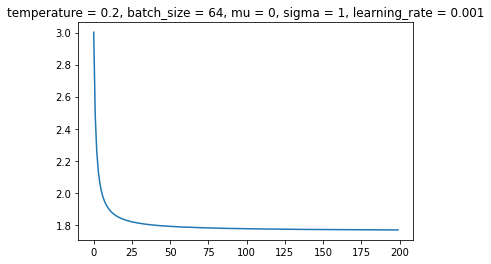

In [13]:
import matplotlib.pyplot as plt
# with plt.xkcd():
plt.plot(epoch_wise_loss)
plt.title("temperature = {0}, batch_size = {1}, mu = {2}, sigma = {3}, learning_rate = {4}".format(temperature, batch_size, mu, sigma, learning_rate))
plt.savefig('4')
plt.show()
    

In [ ]:
# input_shape = tf.keras.Input(shape=[25, 20, 3])
# model = tf.keras.model(input_shape, get_model(input_shape))


# def train_step()
#   # reconstruct logits
#   labels = tf.concat([tf.range(start=0, limit=batch_size) for _ in range(views)], axis=0) #连接在一个维度的张量，range是创造一系列数字，labels现在的维度 128
#   labels = tf.cast(tf.expand_dims(labels, axis=0) == tf.expand_dims(labels, axis=1), dtype=tf.float32) #更改维度，行维度变成和列维度一样，变换类型,128*128


#   zis = tf.math.l2_normalize(features, axis=1)
#   zjs = tf.math.l2_normalize(features, axis=1)
#   # features = features / tf.math.reduce_euclidean_norm(features, axis=1, keepdims=True) #模为1
#   # x_x = tf.matmul(features, features, transpose_b=True)
#   similarity_matrix = tf.matmul(zis, zjs, transpose_b=True)
#   print(similarity_matrix.shape)

#   mask = tf.linalg.eye(labels.shape[0], dtype=tf.bool)
#   labels = tf.reshape(labels[~mask], [labels.shape[0], -1])
#   similarity_matrix = tf.reshape(similarity_matrix[~mask], [labels.shape[0], -1])#？
#   positives = tf.reshape(similarity_matrix[tf.cast(labels, dtype=tf.bool)], [labels.shape[0], -1])#？
#   negatives = tf.reshape(similarity_matrix[~tf.cast(labels, dtype=tf.bool)], [similarity_matrix.shape[0], -1])#？
#   print(positives.shape, negatives.shape)
#   logits = tf.concat([positives, negatives], axis=1)#？
#   logits = logits / temperature

#   labels = labels = tf.zeros(BATCH_SIZE * views, dtype=tf.int32)
#   loss = criterion(y_pred=logits, y_true=labels)
#   loss = loss / (views * batch_size)
#   # print(logits.shape[0])
#   # labels = tf.zeros(logits.shape[0], dtype=tf.float32)
#   return logits

# input_1 = tf.keras.Input(shape=[25, 20, 3])
# input_2 = tf.keras.Input(shape=[25, 20, 3])
# outputs = build_model(input_1, input_2)
# model = tf.keras.Model((input_1, input_2), outputs)
# model.compile(
#   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='sum_over_batch_size'),  #将数字编码转化成one-hot编码格式，然后对one-hot编码格式的数据（真实标签值）与预测出的标签值使用交叉熵损失函数
#   metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] #检查y_true中的值（本身就是index）与y_pred中的最大值对应的index是否相等，针对稀疏情况的多分类
# )

In [ ]:
# def data_generator(X_t, X_t_a):
#   while True:
#     random_idx = np.random.randint(0, high=X_t.shape[0], size=batch_size)
#     input_1 = X_t[random_idx]
#     input_2 = X_t_a[random_idx]
#     target = np.zeros(batch_size*views, dtype=int)#？
#     yield ((input_1, input_2), target)



# ckpt = tf.keras.callbacks.ModelCheckpoint(
#     filepath="/content/drive/MyDrive/ckpt/high_gamma_pretrain_simclr/conv6net.h5",
#     mointor="val_acc",
#     save_best_only=True,
#     save_weights_only=True,
#     mode="max"  #val_acc最大的
# )

# model.fit(
#     x=data_generator(aug_train_X2, train_X), 
#     epochs=100,  #20,30,
#     steps_per_epoch=int(train_X.shape[0]//batch_size*2), #？
#     verbose="auto",
#     validation_data=data_generator(aug_valid_X2, valid_X),
#     validation_steps=int(valid_X.shape[0]//batch_size*2), #？
#     callbacks=[ckpt]
# )